In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


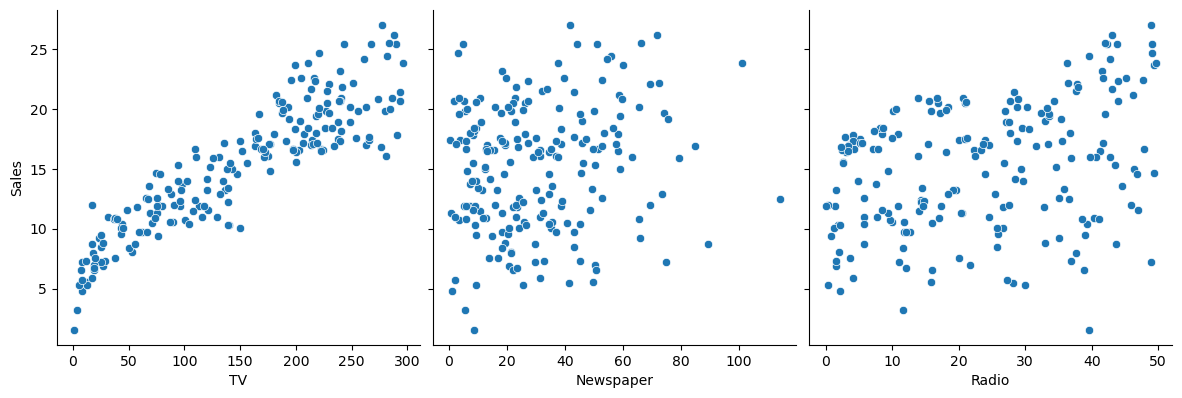

In [7]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',height=4, aspect=1, kind='scatter')
plt.show()

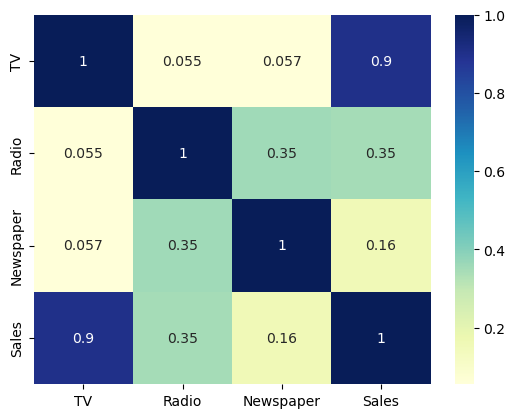

In [8]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [9]:
X = advertising['TV']
y = advertising['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [10]:
X_train.shape

(140,)

In [11]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [12]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
print(lm.intercept_)
print(lm.coef_)
y_pred = lm.predict(X_test)

7.206554548173255
[0.05483488]


In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.814855389208679
Mean Squared Error: 5.179525402166653
Mean Absolute Error: 1.806912377664152


In [ ]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line   (10,50),(10,15)
plt.xlabel("Actual sales price")
plt.ylabel("Predicted sales Price")
plt.title("Actual vs Predicted Sales Prices")
plt.grid(True)
plt.show()